# Classification

In [ ]:
import numpy as np
from collections import Counter
from sklearn import datasets
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap

def euclidean_distance(x1, x2):
  return np.sqrt(np.sum((x1 - x2) ** 2))


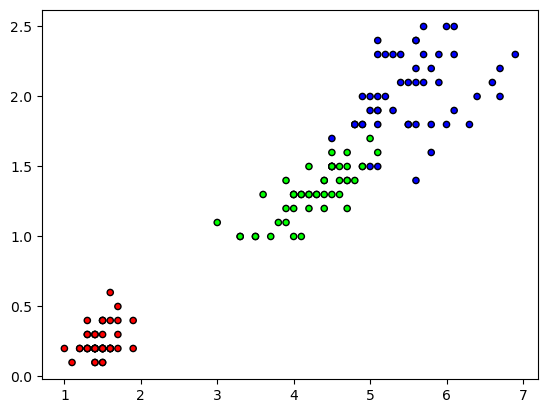

In [ ]:
cmap = ListedColormap( ['#FF0000', '#00FF00', '#0000FF'])
iris = datasets.load_iris()
X, y = iris.data, iris.target
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1234)
plt. figure()
plt.scatter(X[:,2],X[:,3], c=y, cmap=cmap, edgecolor='k', s=20)
plt.show()

In [ ]:
k = 3

def predict(x):
  distances = [euclidean_distance(x, x_train) for x_train in X_train]

  k_indices = np.argsort(distances)[:k]
  k_nearest_labels = [y_train[i] for i in k_indices]

  most_common = Counter(k_nearest_labels).most_common()
  return(most_common[0][0])

predictions = [predict(x) for x in X_test]
print(predictions)
print(y_test)



[1, 1, 2, 0, 1, 0, 0, 0, 1, 2, 1, 0, 2, 1, 0, 1, 2, 0, 2, 1, 1, 1, 1, 1, 2, 0, 2, 1, 2, 0]
[1 1 2 0 1 0 0 0 1 2 1 0 2 1 0 1 2 0 2 1 1 1 1 1 2 0 2 1 2 0]


In [ ]:
acc = np.sum(predictions == y_test) / len(y_test)
print(acc)

1.0


## Class

In [ ]:
class KNN:
  def __init__(self, k=3):
    self.k = k
  
  def fit(self, X, y):
    self.X_train = X
    self.y_train = y

  def predict(self, X):
    return [self._predict(x) for x in X]

  def _predict(self, x):
    distances = [euclidean_distance(x, x_train) for x_train in self.X_train]
    k_indices = np.argsort(distances)[:self.k]
    k_nearest_labels = [self.y_train[i] for i in k_indices]
    most_common = Counter(k_nearest_labels).most_common()
    return most_common[0][0]


In [ ]:
clf = KNN(k=5)
clf.fit(X_train, y_train)
predictions = clf.predict(X_test)
acc = np.sum(np.array(predictions) == y_test) / len(y_test)
print(acc)

0.9666666666666667
